Multi-linear regression

In [28]:
from IPython.display import HTML, display
import csv
import pandas as pd
from pandas import Series, DataFrame
data=pd.read_csv('Sentiment_Reviews_Description_Agg.csv', encoding = "ISO-8859-1")

data_price=data['price'].tolist()  
data_accommodates= data['accommodates'].tolist()
data_bathroom=data['bathrooms'].tolist()
data_bedroom=data['bedrooms'].tolist()
data_rating=data['review_scores_rating'].tolist()  
data_review=data['reviews_per_month'].tolist()  
data_sentiment=data['sentiment_compound_polarity'].tolist() 
data_description=data['description_sentiment_compound_polarity'].tolist() 
#the equation for multiple linear regression: y = b0 + b1x1 + b2x2 + · · · + bp−1xp−1 .
#set the independent variable accommodates','
feature_cols=['accommodates','review_scores_rating' ]
X = data[feature_cols]

# set the dependent variable price
Y = data['price']



In [29]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

airbnb_mul_df=DataFrame(data, columns=['accommodates','bathrooms','bedrooms', 'review_scores_rating', 'reviews_per_month','sentiment_compound_polarity','description_sentiment_compound_polarity', 'price'])

airbnb_model = ols("""price ~ accommodates
                                       + review_scores_rating
                                       + reviews_per_month
                                            """, data=airbnb_mul_df).fit()
# summarize our model
airbnb_model_summary = airbnb_model.summary()

HTML(
(airbnb_model_summary
    .as_html()
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X, Y)
print (model)
print (linreg.intercept_)
print (linreg.coef_)
Y_pred = linreg.predict(X)
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print( "RMSE by hand:",sum_erro)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
-227.8746119077533
[25.58075989  3.15623864]
RMSE by hand: 167.87424299990704


[ -83.39786091  -34.75981398  105.02666035  -59.44205556  -47.08538364
  -14.39257976   87.1203308   -47.34838511    9.02666035   -9.41095329
  -28.0175343    -7.25999581  -22.39786091   15.02666035   34.49537626
  -28.81710102   -3.08010248   71.13870434    3.91461636  -32.0175343
  -73.91077147   46.13870434   34.39642465   30.33913762  -11.86657682
  -56.02281545  115.24018602   34.74528534  -37.9786208   -53.12957829
  -16.08538364  -90.24162227   14.65414497  -79.87185797  -78.91077147
   42.65161489  -41.25471466   37.60213909  -47.8796692   -80.59829419
  -20.78599875  -51.03590784  -75.55409955  -31.97333965   -9.72343056
  -65.70505703  -29.8796692    -9.44205556  -18.91077147   15.02666035
   -5.02281545   23.71418308  -53.75981398   18.43280807  -81.71561934
  -11.76762521  -68.41623445  -39.97333965  880.02666035    3.18289898
  -39.97333965   56.33913762  105.02666035  -33.44733671   80.02666035
   10.55794444    6.08922853    2.40170581   -7.0175343   -22.23634112
   32.8

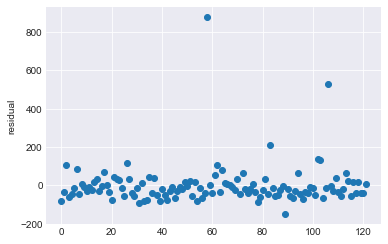

-4.146773998862224e-14
107.47047147402448


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


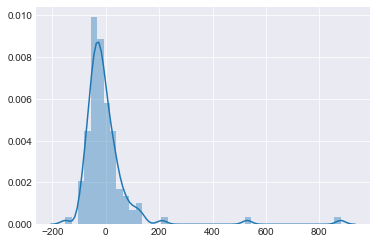

In [31]:
import matplotlib.pyplot as plt 
residual = Y.values-Y_pred
print(residual)
plt.scatter(range(len(Y_pred)),residual)
plt.ylabel("residual")
plt.show()
import numpy as np
from numpy import std

residual_mean = np.mean(residual)

std_residual=std(residual)
print(residual_mean)
print(std_residual)
import seaborn as sns


sns.set_style('darkgrid')

sns.distplot(residual)

Semi-log regression

In [32]:
import csv
import pandas as pd
from pandas import Series, DataFrame
data=pd.read_csv('Sentiment_Reviews_Description_Agg.csv', encoding = "ISO-8859-1")
data.head()
data.shape
feature_cols = ['accommodates','review_scores_rating','reviews_per_month']
X = data[feature_cols]
print(X.head())
# check the type and shape of X
print(type(X))
print(X.shape)
y = data['price']
import numpy as np
ln_y=np.log(y)

   accommodates  review_scores_rating  reviews_per_month
0             3                    93               1.42
1             4                    98               0.23
2             2                    94               0.33
3             2                    97               0.32
4             3                    91               4.36
<class 'pandas.core.frame.DataFrame'>
(122, 3)


In [33]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from IPython.display import HTML, display

airbnb_mul_df=DataFrame(data, columns=['accommodates','bathrooms','bedrooms', 'review_scores_rating', 'reviews_per_month','sentiment_compound_polarity','description_sentiment_compound_polarity', 'ln_price'])

airbnb_model = ols("""ln_price ~ accommodates
                                       + review_scores_rating
                                       + reviews_per_month
                                            """, data=airbnb_mul_df).fit()
# summarize our model
airbnb_model_summary = airbnb_model.summary()

HTML(
(airbnb_model_summary
    .as_html()
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
1.9160138086155922
[ 0.16130921  0.02688026 -0.14225907]
[-6.20260655e-01 -1.58850614e-01  6.97668868e-01 -5.51999674e-01
  2.62840458e-01 -2.09237864e-01  7.24228313e-01 -4.99494829e-01
  1.95439316e-01  3.65089838e-01 -1.89923815e-01  1.13527342e-01
  7.97355094e-02  1.92533607e-01  3.24717093e-01 -6.76876162e-02
  7.57381433e-03  5.12796954e-01  2.23630136e-01 -9.39341232e-02
 -7.46580977e-01  3.38730004e-01  4.25348523e-01  3.36439288e-01
  2.72743015e-01  2.36494169e-01  5.17730384e-01  3.64743110e-01
 -4.13635339e-02 -4.98239147e-01  2.25339641e-02 -7.93323444e-01
 -2.54229515e-02 -3.96224790e-01 -5.53486274e-01  4.28176628e-01
 -5.24751745e-01  3.23025280e-01 -3.76406267e-01 -7.18223896e-01
 -1.45570096e-01 -3.54918448e-01 -5.80032240e-01 -8.60323359e-02
  1.35579346e-01 -8.35033233e-01 -5.89634328e-02 -2.43838988e-02
 -1.05024690e-01  2.30943555e-01  1.22805881e-01  2.56936911e-01
 -2.63928317e-02  2.4

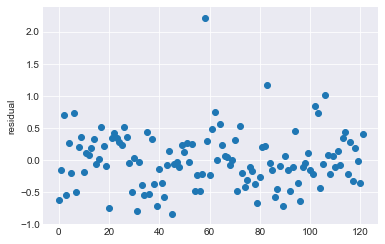

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


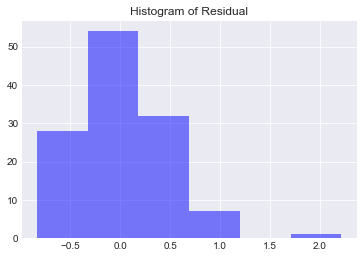

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


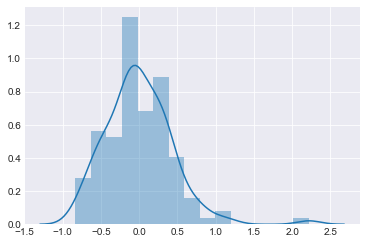

In [34]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
linreg = LinearRegression()
model=linreg.fit(X, ln_y)
print (model)
print (linreg.intercept_)
print (linreg.coef_)
ln_y_pred = linreg.predict(X)
residual = ln_y.values-ln_y_pred
print(residual)
import numpy as np
from numpy import std

residual_mean = np.mean(residual)

std_residual=std(residual)
print(residual_mean)
print(std_residual)

plt.scatter(range(len(ln_y_pred)),residual)
plt.ylabel("residual")
plt.show()

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
num_bins=6
n, bins, patches = plt.hist(residual, num_bins, facecolor='blue', alpha=0.5)
y = mlab.normpdf(bins, residual_mean, std_residual)
plt.title(r'Histogram of Residual')
plt.show()
import seaborn as sns


sns.set_style('darkgrid')
sns.distplot(residual)

multivariate polynomial regression

In [35]:
import csv
import pandas as pd
from pandas import Series, DataFrame
data=pd.read_csv('Sentiment_Reviews_Description_Agg.csv', encoding = "ISO-8859-1")
data.head()
data.shape
feature_cols = ['accommodates','review_scores_rating','price']
dataset=data[feature_cols]

In [36]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import cm
from matplotlib import pyplot
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D
S = dataset.iloc[:,0:2].values
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
S_poly = poly_feats.fit_transform(S)

In [37]:
A = dataset.iloc[:,0].values
R = dataset.iloc[:,1].values
P = dataset.iloc[:,2].values

preparing the data according to a degree 4 polynomial scheme :
the possible model formula is of the form : P ~ b00.A^0.R^0 + b10.A^1.R^0 + b20.A^2.R^0 + b30.A^3.R^0 + b40.A^4.R^0 + b01.A^0.R^1 + b11.A^1.R^1 + b21.A^2.R^1 + b31.A^3.R^1 + b02.A^0.R^2 + b12.A^1.R^2 + b22.A^2.R^2 + b03.A^0.R^3 + b13.A^1.R^3 + b04.A^0.R^4

In [38]:
S_poly = np.zeros((122, 15))
S_poly[:, 0] = np.ones(1) #A0R0
S_poly[:, 1] = A*1 #A1R0
S_poly[:, 2] = A*A*1 #A2R0
S_poly[:, 3] = A*A*A*1 #A3R0
S_poly[:, 4] = A*A*A*A*1 #A4R0
S_poly[:, 5] = 1*R #A0R1
S_poly[:, 6] = A*R #A1R1
S_poly[:, 7] = A*A*R #A2R1
S_poly[:, 8] = A*A*A*R #A3R1
S_poly[:, 9] = 1*R*R #A0R2
S_poly[:, 10] = A*R*R #A1R2
S_poly[:, 11] = A*A*R*R #A2R2
S_poly[:, 12] = 1*R*R*R #A0R3
S_poly[:, 13] = A*R*R*R #A1R3
S_poly[:, 14] = 1*R*R*R*R #A0R4
print(S_poly)

[[1.0000000e+00 3.0000000e+00 9.0000000e+00 ... 8.0435700e+05
  2.4130710e+06 7.4805201e+07]
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 ... 9.4119200e+05
  3.7647680e+06 9.2236816e+07]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 ... 8.3058400e+05
  1.6611680e+06 7.8074896e+07]
 ...
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 ... 7.7868800e+05
  3.1147520e+06 7.1639296e+07]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 ... 6.5850300e+05
  1.3170060e+06 5.7289761e+07]
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 ... 8.0435700e+05
  3.2174280e+06 7.4805201e+07]]


We start the backward elimination method by setting the optimal dataset to the 15 variables and we fit the regressor : (Backward elimination is the reverse process. All the independent variables are entered into the equation first and each one is deleted one at a time if they do not contribute to the regression equation.）

In [39]:
#Starting the backward elimination process
S_opt = S_poly[:, [0, 1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12, 13, 14]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.685
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           5.19e-05
Time:                        16:29:07   Log-Likelihood:                -730.07
No. Observations:                 122   AIC:                             1490.
Df Residuals:                     107   BIC:                             1532.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.197e+04   7.67e+04      0.287      0.775    -1.3e+05    1.74e+05
x1         -3.034e+04   3.13e+04     -0.969      0.335   -9.24e+04    3.17e+04
x2         -4190.2340   1290.378     -3.247      0.002   -6748.257   -1632.211
x3            73.3918     45.898      1.599      0.113     -17.597     164.380
x4            -0.7316      0.569     -1.286      0.201      -1.859       0.396
x5          -146.9396   3332.206     -0.044      0.965   -6752.650    6458.771
x6          1339.3992   1064.513      1.258      0.211    -770.874    3449.672
x7            81.6314     23.775      3.433      0.001      34.499     128.763
x8            -0.6222      0.400     -1.557      0.122      -1.414       0.170
x9           -17.4108     57.587     -0.302      0.763    -131.570      96.749
x10          -17.9483     12.089     -1.485      0.141     -41.913       6.017
x11           -0.4042      0.114     -3.545      0.001      -0.630      -0.178
x12            0.3125      0.465      0.671      0.503      -0.610       1.235
x13            0.0761      0.046      1.666      0.099      -0.014       0.167
x14           -0.0015      0.001     -1.002      0.319      -0.004       0.001
==============================================================================
Omnibus:                      184.141   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12578.418
Skew:                           5.827   Prob(JB):                         0.00
Kurtosis:                      51.359   Cond. No.                     6.50e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This first step produce a regressor with the following summary information. We remove the variable with the greatest P such that P < t, which is x5.

In [40]:
#- x5 (sixth =index 5 ) A0R1
S_opt = S_poly[:, [0, 1, 2, 3, 4, 6, 7 ,8, 9, 10, 11, 12, 13, 14]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     4.005
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.48e-05
Time:                        16:29:07   Log-Likelihood:                -730.07
No. Observations:                 122   AIC:                             1488.
Df Residuals:                     108   BIC:                             1527.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.87e+04   1.94e+04      0.964      0.337   -1.98e+04    5.72e+04
x1         -2.984e+04    2.9e+04     -1.028      0.306   -8.74e+04    2.77e+04
x2         -4178.8613   1258.487     -3.321      0.001   -6673.400   -1684.322
x3            73.0568     45.056      1.621      0.108     -16.251     162.365
x4            -0.7291      0.563     -1.294      0.198      -1.846       0.387
x5          1321.6976    981.358      1.347      0.181    -623.524    3266.919
x6            81.4304     23.226      3.506      0.001      35.392     127.469
x7            -0.6190      0.391     -1.582      0.117      -1.395       0.157
x8           -19.8670     14.555     -1.365      0.175     -48.717       8.983
x9           -17.7440     11.114     -1.597      0.113     -39.774       4.286
x10           -0.4033      0.112     -3.608      0.000      -0.625      -0.182
x11            0.3306      0.217      1.522      0.131      -0.100       0.761
x12            0.0753      0.042      1.795      0.075      -0.008       0.159
x13           -0.0015      0.001     -1.655      0.101      -0.003       0.000
==============================================================================
Omnibus:                      184.060   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12555.438
Skew:                           5.823   Prob(JB):                         0.00
Kurtosis:                      51.315   Cond. No.                     2.88e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# - x1 (2nd = index 1) -> A1R0
S_opt = S_poly[:, [0, 2, 3, 4, 6, 7 ,8, 9, 10, 11, 12, 13, 14]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     4.248
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           1.74e-05
Time:                        16:29:08   Log-Likelihood:                -730.67
No. Observations:                 122   AIC:                             1487.
Df Residuals:                     109   BIC:                             1524.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1139.3108   1994.816     -0.571      0.569   -5092.971    2814.349
x1         -4079.6934   1255.104     -3.250      0.002   -6567.269   -1592.117
x2            73.3281     45.066      1.627      0.107     -15.992     162.648
x3            -0.7789      0.561     -1.388      0.168      -1.892       0.334
x4           320.1447    115.068      2.782      0.006      92.083     548.206
x5            79.2540     23.135      3.426      0.001      33.400     125.108
x6            -0.6147      0.391     -1.570      0.119      -1.391       0.161
x7            -5.0336      1.869     -2.694      0.008      -8.737      -1.330
x8            -6.5753      2.326     -2.827      0.006     -11.184      -1.966
x9            -0.3917      0.111     -3.522      0.001      -0.612      -0.171
x10            0.1108      0.038      2.881      0.005       0.035       0.187
x11            0.0340      0.012      2.868      0.005       0.010       0.057
x12           -0.0006      0.000     -2.926      0.004      -0.001      -0.000
==============================================================================
Omnibus:                      183.857   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12555.707
Skew:                           5.810   Prob(JB):                         0.00
Kurtosis:                      51.321   Cond. No.                     1.80e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#-X3 (forth = index 4) A4R0
S_opt = S_poly[:, [0, 2, 3, 6, 7 ,8, 9, 10, 11, 12, 13, 14]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     4.422
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           1.71e-05
Time:                        16:29:08   Log-Likelihood:                -731.73
No. Observations:                 122   AIC:                             1487.
Df Residuals:                     110   BIC:                             1521.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -309.2353   1910.983     -0.162      0.872   -4096.355    3477.885
x1         -3069.3496   1026.575     -2.990      0.003   -5103.780   -1034.919
x2            14.4360     15.212      0.949      0.345     -15.711      44.583
x3           227.6807     94.201      2.417      0.017      40.996     414.365
x4            65.4528     20.976      3.120      0.002      23.884     107.022
x5            -0.1258      0.171     -0.734      0.464      -0.465       0.214
x6            -3.8564      1.672     -2.307      0.023      -7.170      -0.543
x7            -4.8886      1.991     -2.456      0.016      -8.834      -0.943
x8            -0.3513      0.108     -3.259      0.001      -0.565      -0.138
x9             0.0846      0.034      2.515      0.013       0.018       0.151
x10            0.0263      0.011      2.501      0.014       0.005       0.047
x11           -0.0005      0.000     -2.566      0.012      -0.001      -0.000
==============================================================================
Omnibus:                      183.581   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12566.050
Skew:                           5.791   Prob(JB):                         0.00
Kurtosis:                      51.351   Cond. No.                     1.66e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#-X5 (sixth = index 8) A3R1
S_opt = S_poly[:, [0, 2, 3, 6, 7 ,9, 10, 11, 12, 13, 14]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4.831
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           9.22e-06
Time:                        16:29:08   Log-Likelihood:                -732.03
No. Observations:                 122   AIC:                             1486.
Df Residuals:                     111   BIC:                             1517.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        254.4718   1746.464      0.146      0.884   -3206.264    3715.207
x1         -2547.4828    739.431     -3.445      0.001   -4012.715   -1082.251
x2             3.3062      1.339      2.469      0.015       0.653       5.959
x3           180.7629     69.092      2.616      0.010      43.853     317.673
x4            55.6531     16.152      3.446      0.001      23.647      87.660
x5            -3.4204      1.560     -2.193      0.030      -6.511      -0.330
x6            -3.9318      1.502     -2.617      0.010      -6.909      -0.955
x7            -0.3072      0.089     -3.439      0.001      -0.484      -0.130
x8             0.0730      0.030      2.463      0.015       0.014       0.132
x9             0.0215      0.008      2.620      0.010       0.005       0.038
x10           -0.0004      0.000     -2.551      0.012      -0.001   -8.75e-05
==============================================================================
Omnibus:                      181.772   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12042.819
Skew:                           5.702   Prob(JB):                         0.00
Kurtosis:                      50.318   Cond. No.                     1.47e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#-X5 (sixth = index 9) A0R2
S_opt = S_poly[:, [0, 2, 3, 6, 7 ,10, 11, 12, 13, 14]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.674
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.86e-05
Time:                        16:29:08   Log-Likelihood:                -734.62
No. Observations:                 122   AIC:                             1489.
Df Residuals:                     112   BIC:                             1517.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1880.3127   1474.428     -1.275      0.205   -4801.702    1041.076
x1         -1961.9319    701.161     -2.798      0.006   -3351.192    -572.671
x2             2.3822      1.292      1.843      0.068      -0.178       4.943
x3           114.6885     63.224      1.814      0.072     -10.581     239.958
x4            43.1518     15.367      2.808      0.006      12.703      73.600
x5            -2.5156      1.379     -1.824      0.071      -5.249       0.218
x6            -0.2393      0.085     -2.809      0.006      -0.408      -0.070
x7             0.0101      0.008      1.328      0.187      -0.005       0.025
x8             0.0139      0.008      1.836      0.069      -0.001       0.029
x9         -8.318e-05   6.26e-05     -1.330      0.186      -0.000    4.08e-05
==============================================================================
Omnibus:                      182.796   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12096.993
Skew:                           5.765   Prob(JB):                         0.00
Kurtosis:                      50.400   Cond. No.                     1.29e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#-X7 (eighth = index 12) A0R3
S_opt = S_poly[:, [0, 2, 3, 6, 7 ,10, 11, 13, 14]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     5.004
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.51e-05
Time:                        16:29:08   Log-Likelihood:                -735.57
No. Observations:                 122   AIC:                             1489.
Df Residuals:                     113   BIC:                             1514.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0829    229.946      0.235      0.814    -401.481     509.647
x1         -1165.3073    364.326     -3.199      0.002   -1887.102    -443.513
x2             1.4398      1.084      1.329      0.187      -0.707       3.587
x3            33.3815     15.843      2.107      0.037       1.993      64.770
x4            25.7846      8.099      3.184      0.002       9.739      41.830
x5            -0.7387      0.337     -2.193      0.030      -1.406      -0.071
x6            -0.1436      0.046     -3.147      0.002      -0.234      -0.053
x7             0.0041      0.002      2.218      0.029       0.000       0.008
x8         -1.716e-07   2.57e-06     -0.067      0.947   -5.26e-06    4.91e-06
==============================================================================
Omnibus:                      181.814   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11761.714
Skew:                           5.720   Prob(JB):                         0.00
Kurtosis:                      49.722   Cond. No.                     2.94e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#-X8 (ninth = index 14) A0R4
S_opt = S_poly[:, [0, 2, 3, 6, 7 ,10, 11, 13]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     5.769
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           9.81e-06
Time:                        16:29:08   Log-Likelihood:                -735.58
No. Observations:                 122   AIC:                             1487.
Df Residuals:                     114   BIC:                             1510.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1966     57.091      0.687      0.494     -73.900     152.293
x1         -1162.9195    360.984     -3.222      0.002   -1878.026    -447.813
x2             1.4768      0.927      1.593      0.114      -0.360       3.313
x3            33.6372     15.307      2.197      0.030       3.313      63.961
x4            25.6892      7.938      3.236      0.002       9.965      41.414
x5            -0.7402      0.335     -2.212      0.029      -1.403      -0.077
x6            -0.1429      0.044     -3.229      0.002      -0.231      -0.055
x7             0.0041      0.002      2.230      0.028       0.000       0.008
==============================================================================
Omnibus:                      181.767   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11749.800
Skew:                           5.718   Prob(JB):                         0.00
Kurtosis:                      49.698   Cond. No.                     9.71e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#-X2 (third = index 3) A3D0
S_opt = S_poly[:, [0, 2, 6, 7 ,10, 11, 13]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.224
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           1.10e-05
Time:                        16:29:08   Log-Likelihood:                -736.92
No. Observations:                 122   AIC:                             1488.
Df Residuals:                     115   BIC:                             1507.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.6701     37.087      2.930      0.004      35.207     182.133
x1          -803.7577    283.790     -2.832      0.005   -1365.892    -241.623
x2            19.1455     12.393      1.545      0.125      -5.402      43.693
x3            18.2831      6.476      2.823      0.006       5.455      31.112
x4            -0.4509      0.283     -1.594      0.114      -1.011       0.109
x5            -0.1027      0.037     -2.807      0.006      -0.175      -0.030
x6             0.0026      0.002      1.634      0.105      -0.001       0.006
==============================================================================
Omnibus:                      180.726   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11147.406
Skew:                           5.685   Prob(JB):                         0.00
Kurtosis:                      48.428   Cond. No.                     7.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#-X2 (third = index 6) A1R1
S_opt = S_poly[:, [0, 2, 7 ,10, 11, 13]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     6.909
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           1.11e-05
Time:                        16:29:08   Log-Likelihood:                -738.17
No. Observations:                 122   AIC:                             1488.
Df Residuals:                     116   BIC:                             1505.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.7678     36.952      2.727      0.007      27.580     173.956
x1          -418.7990    136.620     -3.065      0.003    -689.392    -148.206
x2             9.5159      3.139      3.031      0.003       3.298      15.734
x3            -0.0144      0.013     -1.066      0.289      -0.041       0.012
x4            -0.0532      0.018     -2.988      0.003      -0.089      -0.018
x5             0.0002      0.000      1.112      0.269      -0.000       0.000
==============================================================================
Omnibus:                      177.395   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9882.694
Skew:                           5.551   Prob(JB):                         0.00
Kurtosis:                      45.672   Cond. No.                     3.64e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#-X3 (forth = index 10) A1R2
S_opt = S_poly[:, [0, 2, 7 ,11, 13]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     8.342
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           5.90e-06
Time:                        16:29:08   Log-Likelihood:                -738.77
No. Observations:                 122   AIC:                             1488.
Df Residuals:                     117   BIC:                             1502.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7036     33.760      2.509      0.013      17.844     151.564
x1          -353.1975    122.051     -2.894      0.005    -594.913    -111.482
x2             7.9175      2.760      2.869      0.005       2.452      13.383
x3            -0.0438      0.015     -2.832      0.005      -0.074      -0.013
x4          8.704e-06   2.51e-05      0.347      0.729    -4.1e-05    5.84e-05
==============================================================================
Omnibus:                      177.152   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9835.525
Skew:                           5.539   Prob(JB):                         0.00
Kurtosis:                      45.569   Cond. No.                     3.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#-X4 (fifth = index 13) A1R3
S_opt = S_poly[:, [0, 2, 7 ,11]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     11.17
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           1.67e-06
Time:                        16:29:08   Log-Likelihood:                -738.83
No. Observations:                 122   AIC:                             1486.
Df Residuals:                     118   BIC:                             1497.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.6912     11.683      8.191      0.000      72.556     118.826
x1          -363.2377    118.130     -3.075      0.003    -597.168    -129.307
x2             8.1211      2.687      3.023      0.003       2.801      13.441
x3            -0.0447      0.015     -2.948      0.004      -0.075      -0.015
==============================================================================
Omnibus:                      176.558   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9739.231
Skew:                           5.508   Prob(JB):                         0.00
Kurtosis:                      45.362   Cond. No.                     1.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#-X3 (forth = index 11) A2R2
S_opt = S_poly[:, [0, 2, 7 ]]
regressor_OLS = sm.OLS(endog = P, exog = S_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     11.65
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.39e-05
Time:                        16:29:08   Log-Likelihood:                -743.16
No. Observations:                 122   AIC:                             1492.
Df Residuals:                     119   BIC:                             1501.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.9282     11.914      8.471      0.000      77.337     124.519
x1           -15.3591      5.669     -2.710      0.008     -26.583      -4.135
x2             0.2028      0.066      3.095      0.002       0.073       0.333
==============================================================================
Omnibus:                      172.893   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8263.012
Skew:                           5.384   Prob(JB):                         0.00
Kurtosis:                      41.853   Cond. No.                     2.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(S_poly[:, [0, 2, 7 ]], P)
print (model)
print (linreg.intercept_)
print (linreg.coef_)
P_pred = linreg.predict(S_poly[:, [0, 2, 7 ]])
print( P_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
100.92817108264083
[  0.         -15.35907866   0.20284464]
[132.47742627 173.243307   115.76144083 118.1955765  128.82622276
 104.63648852 110.08179093 112.5159266  115.76144083 107.64765526
 105.44786708 121.31507934 132.47742627 115.76144083 113.32730516
 114.95006228 104.23079924 105.24502244 128.82622276 105.44786708
 120.62971218 105.24502244 169.99779277 114.13868372 137.95423153
 139.77983328 173.243307   106.8362767  157.01573585 116.57281939
 128.82622276 130.65182451 312.45388749 198.707223   120.62971218
 112.5159266  106.8362767  132.47742627 110.08179093 119.00695506
 104.40214103 110.89316949 134.30302802 115.76144083 109.27041238
 105.0421778  110.08179093 118.1955765  120.62971218 115.76144083
 139.77983328 117.38419795 173.243307   108.45903382 193.63610702
 103.82510996 124.56059357 115.76144083 115.76144083 114.95006228
 115.76144083 114.13868372 115.76144083 166.75227854 115.76144083
 118.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.
  app.launch_new_instance()


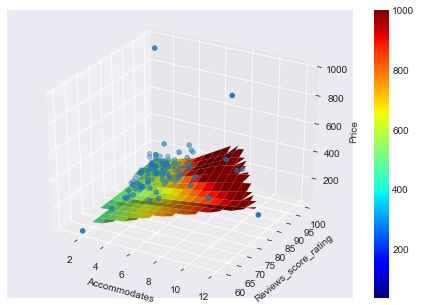

In [53]:
#displaying the 3D graph
from matplotlib import cm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D
import scipy
x = A
y = R
z = P
zp = regressor_OLS.predict(S_opt) #the predictions

xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)
ZP = griddata(x, y, zp, xi, yi,interp='linear')

fig = pyplot.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, ZP, rstride=3, cstride=3, facecolors=cm.jet(ZP/200), linewidth=0, antialiased=True)
ax.scatter(x, y, z)
ax.set_zlim3d(np.min(z), np.max(z))
ax.set_xlabel('Accommodates');
ax.set_ylabel('Reviews_score_rating')
ax.set_zlabel('Price')
colorscale = cm.ScalarMappable(cmap=cm.jet)
colorscale.set_array(z)
fig.colorbar(colorscale)

pyplot.show()

[-7.34774263e+01 -2.42433070e+01  1.09238559e+02 -4.81955765e+01
 -3.98262228e+01 -2.46364885e+01  7.49182091e+01 -5.25159266e+01
  1.32385592e+01 -2.86476553e+01 -2.64478671e+01  4.68492066e+00
 -1.24774263e+01  1.92385592e+01  3.16726948e+01 -2.69500623e+01
 -1.92307992e+01  6.97549776e+01  1.11737772e+01 -3.04478671e+01
 -5.56297122e+01  4.47549776e+01  4.50022072e+01  2.98613163e+01
  2.04576847e+00 -4.07798333e+01  1.25756693e+02  1.31637233e+01
 -2.70157359e+01 -4.65728194e+01 -8.82622276e+00 -8.16518245e+01
 -4.04538875e+01 -7.87072230e+01 -6.06297122e+01  3.74840734e+01
 -6.28362767e+01  4.75225737e+01 -6.00817909e+01 -6.70069551e+01
 -4.94021410e+01 -6.08931695e+01 -6.43030280e+01 -2.77614408e+01
 -2.42704124e+01 -7.00421778e+01 -4.20817909e+01  1.80442350e+00
 -6.29712175e-01  1.92385592e+01  1.02201667e+01  3.26158021e+01
 -4.32433070e+01  1.54096618e+00 -7.86361070e+01 -3.38251100e+01
 -5.65605936e+01 -3.57614408e+01  8.84238559e+02  5.04993772e+00
 -3.57614408e+01  5.58613

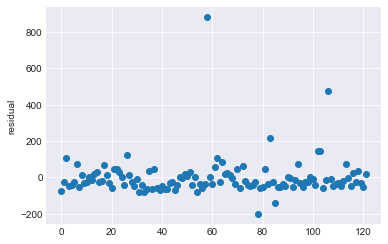

1.2230653648329593e-14
106.97278812224418


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


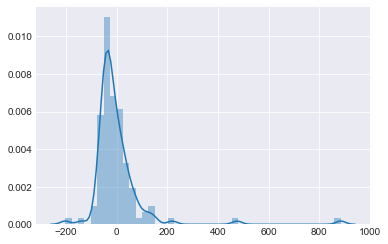

In [54]:
residual = P-P_pred
print(residual)
plt.scatter(range(len(P_pred)),residual)
plt.ylabel("residual")
plt.show()
import numpy as np
from numpy import std

residual_mean = np.mean(residual)

std_residual=std(residual)
print(residual_mean)
print(std_residual)
import seaborn as sns


sns.set_style('darkgrid')

sns.distplot(residual)